# Task 1
## Titanic Survival Prediction

# Import required dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression



# load the data frame from csv file to pandas datframe

In [2]:
t_data = pd.read_csv('C:/Users/aadha/tested.csv')

In [4]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# learning about the data set

In [3]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
t_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
t_data.shape

(418, 12)

In [6]:
t_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# we need to handle missing values 


In [14]:
# to handle missing values in the cabin column we will drop it as they are numerous

In [8]:
t_data.drop(columns='Cabin', axis=1, inplace=True)

In [ ]:
# to handle missing values in the age and fare column we will replace them with the mean age and fare

In [9]:
Age = t_data['Age'].mean()

In [10]:
t_data['Age'].fillna(Age, inplace = True)

In [11]:
Fare = t_data['Fare'].mean()

In [12]:
t_data['Fare'].fillna(Fare, inplace = True)

In [13]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [15]:
# Our data is now consistent

In [14]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


# Data Visualization

In [15]:
sns.set()


<Axes: xlabel='Sex', ylabel='count'>

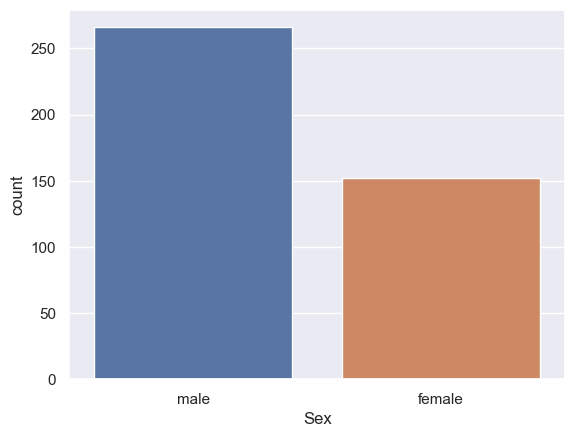

In [16]:
sns.countplot(x='Sex', data=t_data)

In [17]:
t_data['Survived'].value_counts()


Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

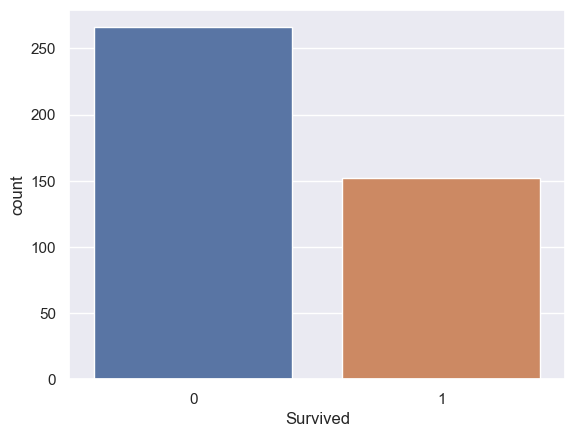

In [18]:
sns.countplot(x='Survived', data=t_data)

<Axes: xlabel='Sex', ylabel='count'>

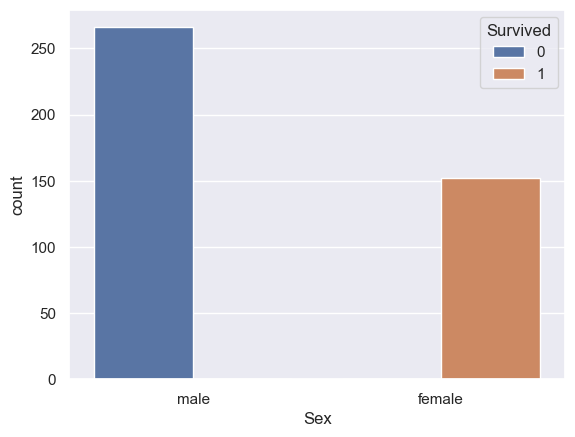

In [19]:
sns.countplot (x='Sex', hue = 'Survived', data = t_data)


# this is clearly visible that those who survived were only females

In [20]:
t_data[['Survived', 'Sex']]

,Survived,Sex
0,0,male
1,1,female
2,0,male
3,0,male
4,1,female
...,...,...
413,0,male
414,1,female
415,0,male
416,0,male


In [23]:
 t_data[['Survived', 'Pclass' ]]

,Survived,Pclass
0,0,3
1,1,3
2,0,2
3,0,3
4,1,3
...,...,...
413,0,3
414,1,1
415,0,3
416,0,3


<Axes: xlabel='Pclass', ylabel='count'>

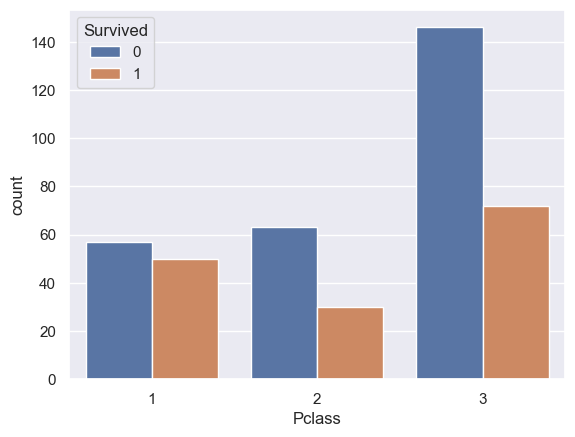

In [21]:
sns.countplot(x ='Pclass',hue= 'Survived', data=t_data)

# converting the categorical variables into numerical data

In [22]:
t_data.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [23]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [ ]:
# Now drop the columns which are irrelevant for the survival prediction, such as PassengerId, Name and Ticket

In [25]:
t_data.drop(columns={'PassengerId','Name','Ticket'},axis=1, inplace=True)

In [26]:
t_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


# separating features and target

In [27]:
X = t_data.drop(columns='Survived', axis=1)
Y = t_data['Survived']


In [28]:
print(X)
print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# splitting the data into training and testing

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [30]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Model Training

In [38]:
# we're using logistic regression model that uses binary classification for the prediction

In [32]:
model = LogisticRegression()

In [42]:
#training the model with the training data

In [33]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation
Accuracy Score || Precision Score || Recall Score

In [35]:
X_test_prediction = model.predict(X_test)

In [40]:
# accuracy score for training data

In [41]:
# accuracy score for test data

In [39]:
print(X_test_prediction)

[0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 1 0 1]


In [40]:
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print('Accuracy score of test data is : ',testing_data_accuracy)

Accuracy score of test data is :  1.0


In [45]:
# precision score

In [43]:
test_data_precision = precision_score(Y_test, X_test_prediction)

In [83]:

print('test data precion is :', test_data_precision)

test data precion is : 1.0


In [49]:
# recall score

In [46]:
test_data_recall = recall_score(Y_train, X_train_prediction)

In [84]:
print('test data recall is :', test_data_recall)

test data recall is : 1.0


In [48]:
from sklearn import metrics

In [49]:
score = model.score(X_test,Y_test)
print(score)

1.0


In [50]:
cm = metrics.confusion_matrix(Y_train, X_train_prediction)
print(cm)

[[217   0]
 [  0 117]]


Text(0.5, 1.0, "('Accuracy Score :', 1.0)")

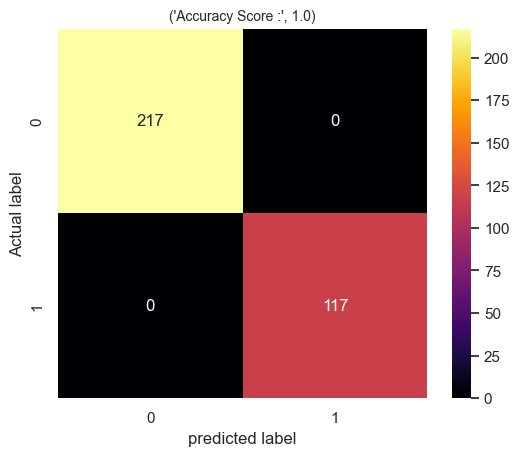

In [52]:
sns.heatmap(cm, annot = True, fmt = "d", square = True, cmap= "inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :',score)
plt.title(title, size = 10)

In [119]:
classification_report(X_test_pred, Y_test)

'              precision    recall  f1-score   support\n\n           0       0.80      0.67      0.73        58\n           1       0.46      0.62      0.52        26\n\n    accuracy                           0.65        84\n   macro avg       0.63      0.64      0.63        84\nweighted avg       0.69      0.65      0.67        84\n'

# Model 2 
# Random Forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model_2 = RandomForestClassifier(n_estimators=100)

In [61]:
model_2.fit(X_train,Y_train)

RandomForestClassifier()

In [68]:
X_test_pred = model_2.predict(X_test)

In [85]:
model_2.score(X_train, Y_train)
acc_score = round(model_2.score(X_test, Y_test) * 100, 2)
model_2_acc = accuracy_score(X_test_pred, Y_test)

In [86]:
model_2_acc

1.0

In [87]:
acc_score

100.0

In [90]:
precision = precision_score(X_test_pred, Y_test)
recall = recall_score(X_test_pred, Y_test)

In [116]:
print(precision)
print(recall)

1.0
1.0


In [118]:
classification_report(X_test_pred, Y_test)

'              precision    recall  f1-score   support\n\n           0       0.80      0.67      0.73        58\n           1       0.46      0.62      0.52        26\n\n    accuracy                           0.65        84\n   macro avg       0.63      0.64      0.63        84\nweighted avg       0.69      0.65      0.67        84\n'

# Model 3
# KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
model_3 = KNeighborsClassifier(n_neighbors=3)

In [99]:
model_3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [101]:
X_test_pred = model_3.predict(X_test)

In [135]:
model_3_acc = accuracy_score(X_test_pred, Y_test, normalize=True)

In [105]:
model_3_score = round(model_3.score(X_train, Y_train) * 100, 2)

In [107]:
model_3_precision = precision_score(X_test_pred, Y_test)
model_3_recall = recall_score(X_test_pred, Y_test)

In [136]:
model_3_score

85.63

In [137]:
model_3_acc

0.6547619047619048

In [112]:
print(model_3_precision)
print(model_3_recall)

0.45714285714285713
0.6153846153846154


In [115]:
classification_report(X_test_pred, Y_test)

'              precision    recall  f1-score   support\n\n           0       0.80      0.67      0.73        58\n           1       0.46      0.62      0.52        26\n\n    accuracy                           0.65        84\n   macro avg       0.63      0.64      0.63        84\nweighted avg       0.69      0.65      0.67        84\n'

# Predicting values

In [134]:
print(X) 
print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [130]:
p1 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])
p2 = model_2.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])
p3 = model_3.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])

C:\Users\aadha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\aadha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\aadha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [129]:
print(p1)
print(p2)
print(p3)

[0]
[0]
[0]


In [131]:
p1 = model.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
p2 = model_2.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
p3 = model_3.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])

C:\Users\aadha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\aadha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\aadha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [132]:
print(p1)
print(p2)
print(p3)

[0]
[0]
[0]


# Our prediction model is ready , and we have also predicted certain values
# We used three different models to predict our target vaiable and saw that they provided different accuracy and precision.